# Notebook: Linear Regreession

This notebook corresponds with the post _A Primer on Linear Regression_. In it, we take a sample of salary data (taken from [Kaggle](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression)) and perform linear regression on it to predict the average salary of someone working given their years of experience

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Load Data

We load the dataset from our csv. The first column is the years of experience and serves as our input `x`. The second column is the average salary and is our output `y`. We divide `y` by 1000 because all annual salaries are given in units of 1000 so we can ignore it

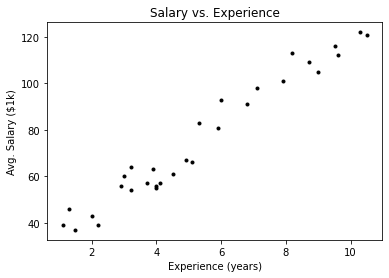

In [3]:
# Load and process data
data = np.loadtxt('data/salary_data.csv', delimiter=',', skiprows=1)
x = data[:,0]
y = data[:,1] // 1000

# Plot initial data
plt.scatter(x, y, c='k', marker='.')
plt.xlabel('Experience (years)')
plt.ylabel('Avg. Salary ($1k)')
plt.title('Salary vs. Experience')
plt.show()

## Performing Regression

Already we can see the linearity of this data. Although it isn't an exact line, it does resemble a line. To find the line of best fit $\hat{y} = a_0 + a_1x$, we use the following equation to get the parameters $a_0$ and $a_1$ for our line

$$
\begin{bmatrix}
    N & \sum{x_i} \\
    \sum{x_i} & \sum{x_i^2}
\end{bmatrix}
\begin{bmatrix}
    a_0 \\
    a_1
\end{bmatrix}
=
\begin{bmatrix}
    \sum{y_i} \\
    \sum{y_ix_i}
\end{bmatrix}
$$

In [4]:
# Get matrix parameters
A = np.array([
    [ x.shape[0], x.sum()      ],
    [ x.sum(),    (x**2).sum() ]
])
B = np.array([
    y.sum(),
    (y*x).sum()
])

# Perform matrix solution
Ainv = np.linalg.inv(A)
a = np.matmul(Ainv, B)
a0, a1 = a
print('Our equation: yhat = {0:.2f} + {1:.2f}*x'.format(a0, a1))

Our equation: yhat = 25.42 + 9.43*x


## Evaluating the Results

Now for the moment of truth, we'll take our `x` input data, make a set of predictions `yhat` using our equation above, and plot those predictions against `y`. We also compute the `R2` value of our model and display that on the graph

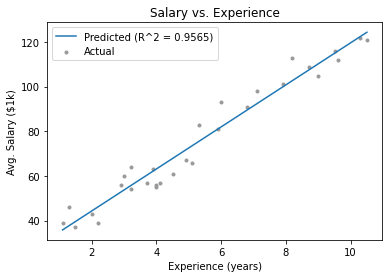

In [5]:
# Generate yhat
yhat = a0 + a1*x

# Compute R^2
V = ((y - y.mean())**2).sum()
J = ((y - yhat)**2).sum()
R2 = 1 - J/V

# Plot wrt y
plt.scatter(x, y, c='#999', marker='.')
plt.plot(x, yhat)
plt.xlabel('Experience (years)')
plt.ylabel('Avg. Salary ($1k)')
plt.title('Salary vs. Experience')
plt.legend(['Predicted (R^2 = {0:.4f})'.format(R2), 'Actual'])
plt.show()

## Making a Prediction

Using our model, we can now predict the salary of someone who has around 8 years of work experience.

In [9]:
x0 = 8
yhat0 = a0 + a1*x0
print('Predicted salary for someone with {0} years of experience: around {1:0.0f}k'.format(x0, yhat0))

Predicted salary for someone with 8 years of experience: around 101k
